# **Course 3 Automatidata project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

You are the newest data professional in a fictional data consulting firm: Automatidata. The team is still early into the project, having only just completed an initial plan of action and some early Python coding work. 

Luana Rodriquez, the senior data analyst at Automatidata, is pleased with the work you have already completed and requests your assistance with some EDA and data visualization work for the New York City Taxi and Limousine Commission project (New York City TLC) to get a general understanding of what taxi ridership looks like. The management team is asking for a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help understand the data. At the very least, include a box plot of the ride durations and some time series plots, like a breakdown by quarter or month. 

Additionally, the management team has recently asked all EDA to include Tableau visualizations. For this taxi data, create a Tableau dashboard showing a New York City map of taxi/limo trips by month. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director at the New York City TLC is a person with visual impairments.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

In [4]:
# Import packages and libraries
#==> ENTER YOUR CODE HERE

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import express as px



**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [5]:
# Load dataset into dataframe
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: Analyze 

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### Task 2a. Data exploration and cleaning

Decide which columns are applicable

The first step is to assess your data. Check the Data Source page on Tableau Public to get a sense of the size, shape and makeup of the data set. Then answer these questions to yourself: 

Given our scenario, which data columns are most applicable? 
Which data columns can I eliminate, knowing they won’t solve our problem scenario? 

Consider functions that help you understand and structure the data. 

*    head()
*    describe()
*    info()
*    groupby()
*    sortby()

What do you do about missing data (if any)? 

Are there data outliers? What are they and how might you handle them? 

What do the distributions of your variables tell you about the question you're asking or the problem you're trying to solve?




==> ENTER YOUR RESPONSE HERE

Start by discovering, using head and size. 

In [6]:
#==> ENTER YOUR CODE HERE
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [7]:
#==> ENTER YOUR CODE HERE
df.size

408582

In [8]:
df.shape

(22699, 18)

Use describe... 

In [9]:
#==> ENTER YOUR CODE HERE
df.describe()


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


**I noticed that the min fareamount is -120... this is very strange (is it a refund?)**

**RateCodeID has a max of 99 but there are only 6 possible RateCodeID values - is this an error?**

**payment_type has a max of 4 but there are 6 possible RateCodeID values - are unknown and voided trips intetionally excluded??**

And info. 

In [10]:
df = df[df["fare_amount"] >= 0] 
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.268500e+04,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000
mean,5.675861e+07,1.555962,1.642231,2.914952,1.043244,162.421732,161.544545,1.335552,13.041876,0.333723,0.498038,1.836914,0.312734,0.299921,16.328490
std,3.274427e+07,0.496869,1.285034,3.653698,0.708122,66.632736,70.136002,0.493288,13.212569,0.462812,0.031257,2.801119,1.399622,0.004878,16.068902
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.852087e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537404e+07,2.000000,2.000000,3.070000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [11]:
df = df[df["RatecodeID"] <= 6]
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.268400e+04,22684.000000,22684.000000,22684.000000,22684.000000,22684.000000,22684.000000,22684.000000,22684.000000,22684.000000,22684.000000,22684.000000,22684.000000,22684.000000,22684.000000
mean,5.675971e+07,1.555987,1.642303,2.915080,1.038926,162.417254,161.540028,1.335567,13.039048,0.333737,0.498038,1.836995,0.312748,0.299921,16.325771
std,3.274457e+07,0.496867,1.285016,3.653728,0.280022,66.630791,70.134248,0.493294,13.205991,0.462817,0.031258,2.801154,1.399651,0.004879,16.064038
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.852071e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673222e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537428e+07,2.000000,2.000000,3.070000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,5.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [12]:
#==> ENTER YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22684 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22684 non-null  int64  
 1   VendorID               22684 non-null  int64  
 2   tpep_pickup_datetime   22684 non-null  object 
 3   tpep_dropoff_datetime  22684 non-null  object 
 4   passenger_count        22684 non-null  int64  
 5   trip_distance          22684 non-null  float64
 6   RatecodeID             22684 non-null  int64  
 7   store_and_fwd_flag     22684 non-null  object 
 8   PULocationID           22684 non-null  int64  
 9   DOLocationID           22684 non-null  int64  
 10  payment_type           22684 non-null  int64  
 11  fare_amount            22684 non-null  float64
 12  extra                  22684 non-null  float64
 13  mta_tax                22684 non-null  float64
 14  tip_amount             22684 non-null  float64
 15  to

**tpep_pickup_datetime is an object type, it needs to be converted to datetime**

**tpep_dropoff_datetime is an object type, it needs to be converted to datetime**

**store_and_fwd_flag is an object type, it needs to be converted to boolean**

### Task 2b. Assess whether dimensions and measures are correct

On the data source page in Tableau, double check the data types for the applicable columns you selected on the previous step. Pay close attention to the dimensions and measures to assure they are correct. 

In Python, consider the data types of the columns. *Consider:* Do they make sense? 

Review the link provided in the previous activity instructions to create the required Tableau visualization. 

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: Construct 

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### Task 3. Data visualization

You’ve assessed your data, and decided on which data variables are most applicable. It’s time to plot your visualization(s)!


### Boxplots

Perform a check for outliers on relevant columns such as trip distance and trip duration. Remember, some of the best ways to identify the presence of outliers in data are box plots and histograms. 

**Note:** Remember to convert your date columns to datetime in order to derive total trip duration.  

In [19]:
# Convert data columns to datetime
#==> ENTER YOUR CODE HERE
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22684 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22684 non-null  int64         
 1   VendorID               22684 non-null  int64         
 2   tpep_pickup_datetime   22684 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22684 non-null  datetime64[ns]
 4   passenger_count        22684 non-null  int64         
 5   trip_distance          22684 non-null  float64       
 6   RatecodeID             22684 non-null  int64         
 7   store_and_fwd_flag     22684 non-null  object        
 8   PULocationID           22684 non-null  int64         
 9   DOLocationID           22684 non-null  int64         
 10  payment_type           22684 non-null  int64         
 11  fare_amount            22684 non-null  float64       
 12  extra                  22684 non-null  float64       
 13  m

**trip distance**

Text(0.5, 1.0, 'Trip Distance Box Plot')

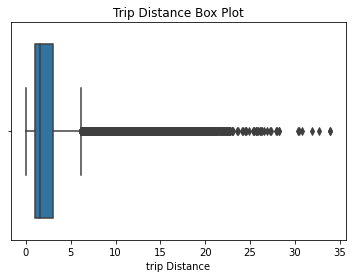

In [20]:
# Create box plot of trip_distance

sns.boxplot(data = df,
            x = 'trip_distance')
plt.xlabel('trip Distance')
plt.title('Trip Distance Box Plot')

<function matplotlib.pyplot.show(*args, **kw)>

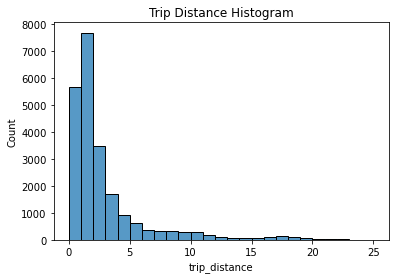

In [21]:
# Create histogram of trip_distance
#==> ENTER YOUR CODE HERE

sns.histplot(data = df, 
             x = 'trip_distance',
            binrange = (0, 25),
            binwidth = 1)
plt.title("Trip Distance Histogram")
plt.show

**total amount**

Text(0.5, 1.0, 'Total Amount Box Plot')

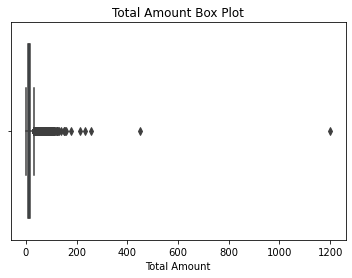

In [22]:
# Create box plot of total_amount
#==> ENTER YOUR CODE HERE

sns.boxplot(data = df, 
           x = 'total_amount')
plt.xlabel("Total Amount")
plt.title("Total Amount Box Plot")

Text(0.5, 1.0, 'Total Amount Histogram')

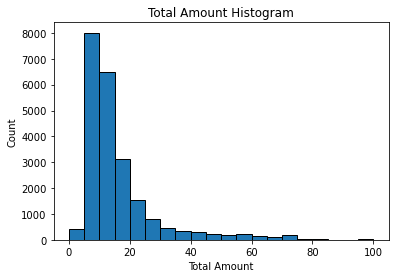

In [23]:
# Create histogram of total_amount
#==> ENTER YOUR CODE HERE
sns.histplot(data = df,
            x = "total_amount",
            binrange = (0, 100),
            binwidth = 5,
            alpha = 1)
plt.xlabel("Total Amount")
plt.title("Total Amount Histogram")

**tip amount**

Text(0.5, 1.0, 'Tip Amount Box Plot')

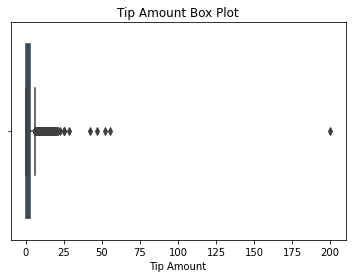

In [24]:
# Create box plot of tip_amount
#==> ENTER YOUR CODE HERE
sns.boxplot(data = df,
           x = "tip_amount")
plt.xlabel("Tip Amount")
plt.title("Tip Amount Box Plot")

Text(0.5, 1.0, 'Tip Amount Histogram')

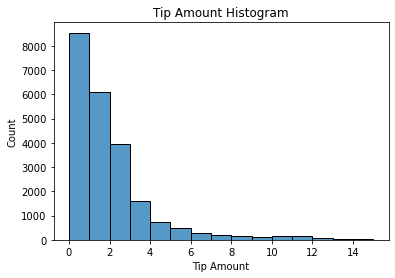

In [25]:
# Create histogram of tip_amount
#==> ENTER YOUR CODE HERE
sns.histplot(data = df,
            x = "tip_amount",
            binrange = (0, 15),
            binwidth = 1)
plt.xlabel("Tip Amount")
plt.title("Tip Amount Histogram")

**tip_amount by vendor**

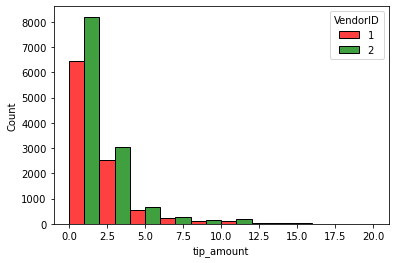

In [26]:
# Create histogram of tip_amount by vendor
#==> ENTER YOUR CODE HERE

sns.histplot(data = df,
            x = "tip_amount",
            hue = "VendorID",
            multiple = "dodge",
            palette = ["red", "green"],
            binrange = (0, 20),
            binwidth = 2)

Next, zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.

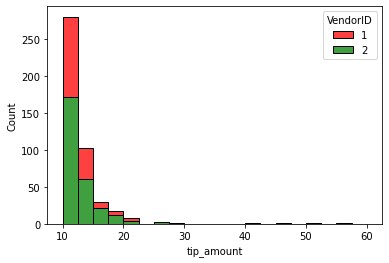

In [27]:
# Create histogram of tip_amount by vendor for tips > $10 
#==> ENTER YOUR CODE HERE
sns.histplot(data = df[df["tip_amount"] > 10],
            x = "tip_amount",
            hue = "VendorID",
            multiple = "stack",
            palette = ["red", "green"],
            binrange = (10, 60),
            binwidth = 2.5)

**Mean tips by passenger count**

Examine the unique values in the `passenger_count` column.

In [28]:
#==> ENTER YOUR CODE HERE
df["passenger_count"].unique()

array([6, 1, 2, 4, 5, 3, 0])

In [29]:
# Calculate mean tips by passenger_count
#==> ENTER YOUR CODE HERE
mean_tips_by_passenger_count = pd.DataFrame(df.groupby("passenger_count"
                                         ).mean()["tip_amount"])
mean_tips_by_passenger_count['index_col'] = mean_tips_by_passenger_count.index
mean_tips_by_passenger_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tip_amount  7 non-null      float64
 1   index_col   7 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 168.0 bytes


Text(0.5, 1.0, 'bar plot for mean tips by passenger count')

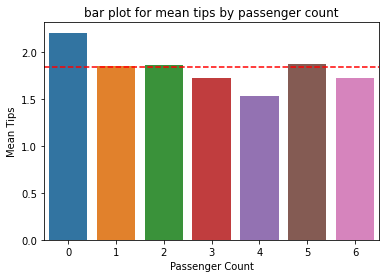

In [30]:
# Create bar plot for mean tips by passenger count
#==> ENTER YOUR CODE HERE
sns.barplot(data = mean_tips_by_passenger_count,
            x = "index_col",
            y = "tip_amount")
plt.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
plt.xlabel("Passenger Count")
plt.ylabel("Mean Tips")
plt.title("bar plot for mean tips by passenger count")

**Create month and day columns**

In [253]:
# Create a month column
#==> ENTER YOUR CODE HERE

df["month"] = df["tpep_pickup_datetime"].dt.month_name().str.slice(stop = 3)

# Create a day column
#==> ENTER YOUR CODE HERE

df["weekday"] = df["tpep_pickup_datetime"
              ].dt.day_name().str.slice(stop = 3)
df.head()


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,weekday
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,Mar,Sat
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,Apr,Tue
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,Dec,Fri
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sun
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,Apr,Sat


**Plot total ride count by month**

Begin by calculating total ride count by month.

In [254]:
# Get total number of rides for each month
#==> ENTER YOUR CODE HERE

df["month"] = pd.Categorical(df["month"]
                             , categories = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
                             , ordered = True)

rides_per_month = pd.DataFrame(df.groupby("month")
                               .count()
                               .reset_index()).rename(columns = {"Unnamed: 0":"number of rides"}
                                                     )[["month", "number of rides"]]
rides_per_month

,month,number of rides
0,Jan,1996
1,Feb,1768
2,Mar,2048
3,Apr,2016
4,May,2012
5,Jun,1963
6,Jul,1695
7,Aug,1724
8,Sep,1733
9,Oct,2026


Reorder the results to put the months in calendar order.

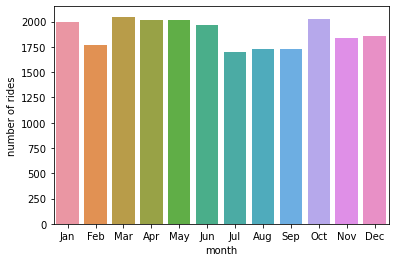

In [255]:
# Create a bar plot of total rides per month
#==> ENTER YOUR CODE HERE
sns.barplot(data = rides_per_month, x = "month", y = "number of rides")

**Plot total ride count by day**

Repeat the above process, but now calculate the total rides by day of the week.

In [256]:
# Repeat the above process, this time for rides by day
#==> ENTER YOUR CODE HERE

df["weekday"] = pd.Categorical(df["weekday"]
                               , categories = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
                               , ordered = True)

rides_per_day = pd.DataFrame(df.groupby("weekday")
                             .count()
                             .reset_index()).rename(columns = {"Unnamed: 0" : "rides per day"})[["weekday", "rides per day"]]

rides_per_day

,weekday,rides per day
0,Mon,2929
1,Tue,3196
2,Wed,3388
3,Thu,3400
4,Fri,3411
5,Sat,3364
6,Sun,2996


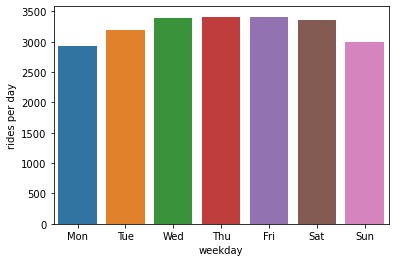

In [257]:
# Create bar plot for ride count by day
#==> ENTER YOUR CODE HERE

sns.barplot(data = rides_per_day
            , x = "weekday"
            , y = "rides per day")

**Plot total revenue by day of the week**

Repeat the above process, but now calculate the total revenue by day of the week.

In [264]:
# Repeat the process, this time for total revenue by day
#==> ENTER YOUR CODE HERE

total_revenue_by_day = pd.DataFrame(df
                                    .groupby("weekday")
                                    .agg({"total_amount": "sum"})
                                    .reset_index()).rename(columns = {"total_amount" : "total revenue"})

total_revenue_by_day

,weekday,total revenue
0,Mon,49582.47
1,Tue,52452.94
2,Wed,55317.57
3,Thu,57190.51
4,Fri,55830.34
5,Sat,51325.30
6,Sun,48634.66


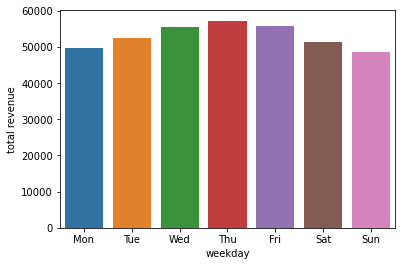

In [265]:
# Create bar plot of total revenue by day
#==> ENTER YOUR CODE HERE

sns.barplot(data = total_revenue_by_day
           , x = "weekday"
           , y = "total revenue")

**Plot total revenue by month**

In [266]:
# Repeat the process, this time for total revenue by month
#==> ENTER YOUR CODE HERE

total_revenue_by_month = pd.DataFrame(df
                                    .groupby("month")
                                    .agg({"total_amount": "sum"})
                                    .reset_index()).rename(columns = {"total_amount" : "total revenue"})

total_revenue_by_month

,month,total revenue
0,Jan,31739.05
1,Feb,28943.69
2,Mar,33091.69
3,Apr,32059.14
4,May,33832.38
5,Jun,32924.82
6,Jul,26626.24
7,Aug,27759.56
8,Sep,28211.18
9,Oct,33070.63


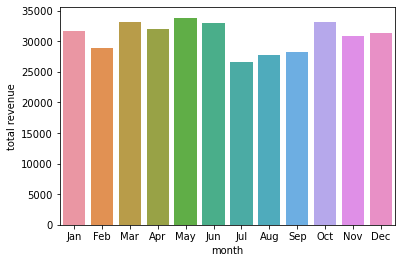

In [267]:
# Create a bar plot of total revenue by month
#==> ENTER YOUR CODE HERE

sns.barplot(data = total_revenue_by_month
           , x = "month"
           , y = "total revenue")

**Plot mean trip distance by drop-off location**

In [272]:
# Get number of unique drop-off location IDs
#==> ENTER YOUR CODE HERE

print("There are "
      , df["DOLocationID"].nunique()
      , "unique drop-off location IDs")


There are  216 unique drop-off location IDs


In [279]:
# Calculate the mean trip distance for each drop-off location
#==> ENTER YOUR CODE HERE

mean_trip_distance_by_DOLocationID = df.groupby("DOLocationID"
                                               ).agg({"trip_distance" : "mean"}
                                                    ).reset_index().rename(columns = {"trip_distance": "mean trip distance"}
                                                                          ).sort_values(by = "mean trip distance"
                                                                                        , ascending = True)
mean_trip_distance_by_DOLocationID
# Sort the results in descending order by mean trip distance
#==> ENTER YOUR CODE HERE


,DOLocationID,mean trip distance
164,207,1.200000
154,193,1.390556
192,237,1.558983
189,234,1.727806
109,137,1.818852
...,...,...
40,51,17.310000
5,11,17.945000
167,210,20.500000
21,29,21.650000


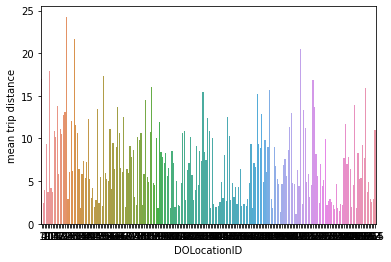

In [282]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
#==> ENTER YOUR CODE HERE
sns.barplot(data = mean_trip_distance_by_DOLocationID
            , x = "DOLocationID"
            , y = "mean trip distance"
            )

**Create a scatter plot for trip distance and fare amount**

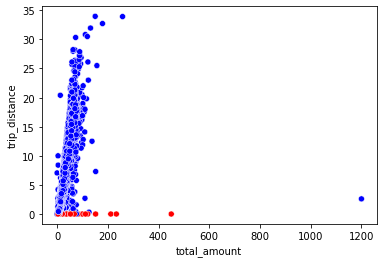

In [37]:
sns.scatterplot(data = df
                , x = "total_amount"
                , y = "trip_distance"
                , c = np.where((df["trip_distance"] == 0) & (df["total_amount"] != 0) , "r", "b"))

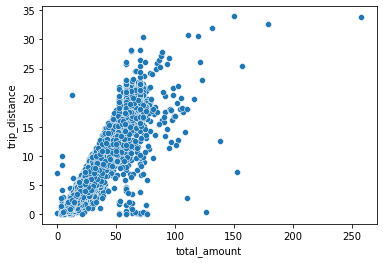

In [39]:
sns.scatterplot(data = df [(df["trip_distance"] > 0) & (df["total_amount"] < 1000)]
                , x = "total_amount"
                , y = "trip_distance")